In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
full = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

In [6]:
face = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

In [7]:
full.shape
face.shape

(375, 486, 3)

In [8]:
face.shape


(375, 486, 3)

In [9]:
full.shape


(1367, 1025, 3)

In [13]:
methods = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR", "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]

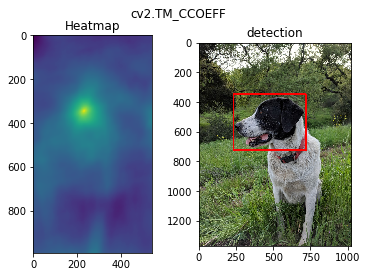

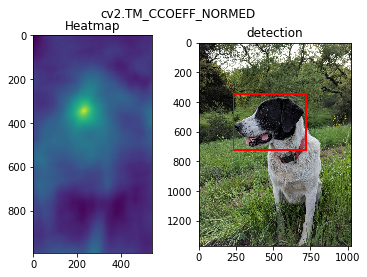

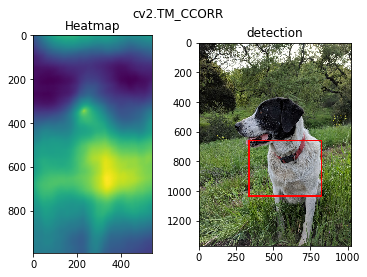

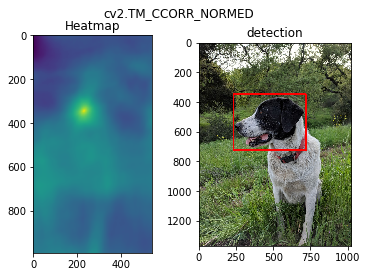

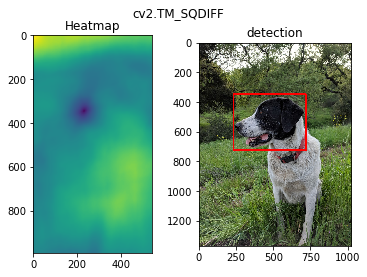

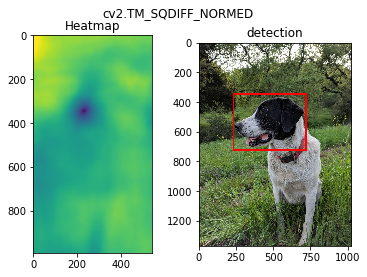

In [20]:
for m in methods:
    full_copy = full.copy()
    method = eval(m)
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_value, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    height, width, channels = face.shape
    bottom_right = (top_left[0] +width, top_left[1]+height)
    rect = cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), thickness = 10)
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("detection")
    plt.suptitle(m)
    
    plt.show()
    print("\n")
    print("\n")

In [23]:
flat_chess = full = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

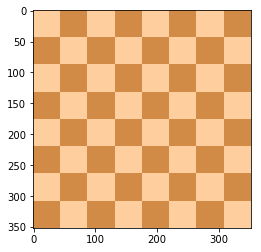

In [24]:
plt.imshow(flat_chess)

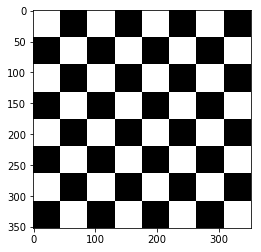

In [25]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap = "gray")

In [26]:
real_chess = full = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

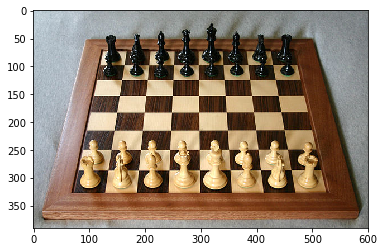

In [27]:
plt.imshow(real_chess)

In [29]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [64]:
gray = np.float32(gray_flat_chess)

In [65]:
dst = cv2.cornerHarris(src= gray_flat_chess, blockSize=2, ksize= 3, k=0.04)

In [66]:
dst1= cv2.dilate(dst, None)

In [73]:
flat_chess[dst1>100*dst1.max()] = (255,0,0)

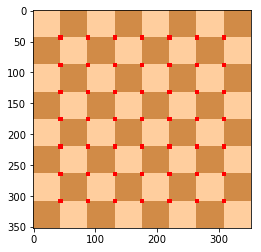

In [74]:
plt.imshow(flat_chess)

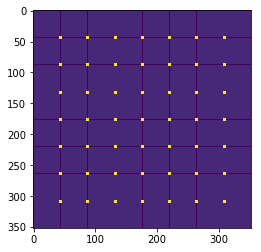

In [43]:
plt.imshow(dst)

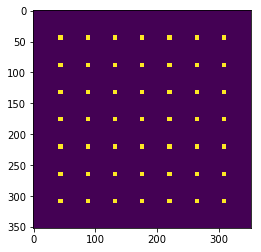

In [44]:
plt.imshow(dst1)

In [45]:
dst


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
dst1


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
dst.max()

0.0004436307

In [48]:
dst1.max()

0.0004436307

In [49]:
gray = np.float32(gray_real_chess)

In [50]:
gray


array([[210., 204., 202., ..., 119., 119., 124.],
       [203., 200., 199., ..., 118., 116., 117.],
       [213., 214., 212., ..., 130., 128., 128.],
       ...,
       [120., 131., 144., ..., 115., 119., 118.],
       [124., 143., 153., ..., 111., 112., 107.],
       [135., 155., 156., ..., 113., 113., 107.]], dtype=float32)

In [54]:
dst = cv2.cornerHarris(gray,blockSize = 2, ksize = 3, k= 0.04)

In [55]:
dst1= cv2.dilate(dst, None)

In [62]:
real_chess[dst1 >0.5*dst1.max()] =(255,0,0)

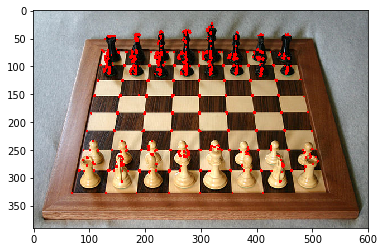

In [63]:
plt.imshow(real_chess)

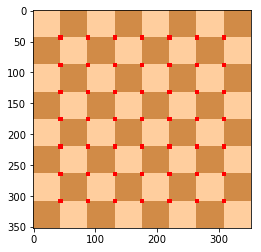

In [75]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
flat_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(flat_chess)

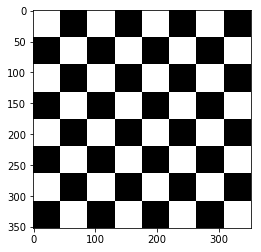

In [77]:
flat_chess = full = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap = "gray")

In [78]:
real_chess = full = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [87]:
corner = cv2.goodFeaturesToTrack(gray_real_chess, maxCorners = 100000, qualityLevel = 0.01, minDistance = 10)

In [88]:
corner = np.int0(corner)

In [89]:
for i in corner:
    x,y= i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

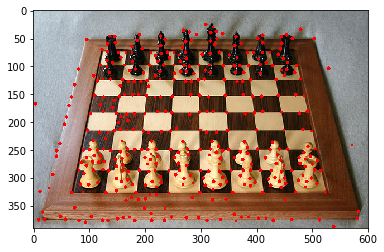

In [90]:
plt.imshow(real_chess)